In [1]:
import torch
from torch.autograd import Variable
from tqdm import tqdm, trange

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns


np.random.seed(42)



In [2]:
plt.rcParams["figure.figsize"] = (20,10)
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
epochs = 10000

In [5]:
from models.models import SimpleModel

In [6]:
N = 100


In [7]:
#[np.random.randn() for x in range(100)]

In [8]:

iters = 100
l2 = 1
n_std = 4


In [9]:
from data.data_generators import generate_data

In [10]:
X,y,X_long,y_long = generate_data(N,0.3)

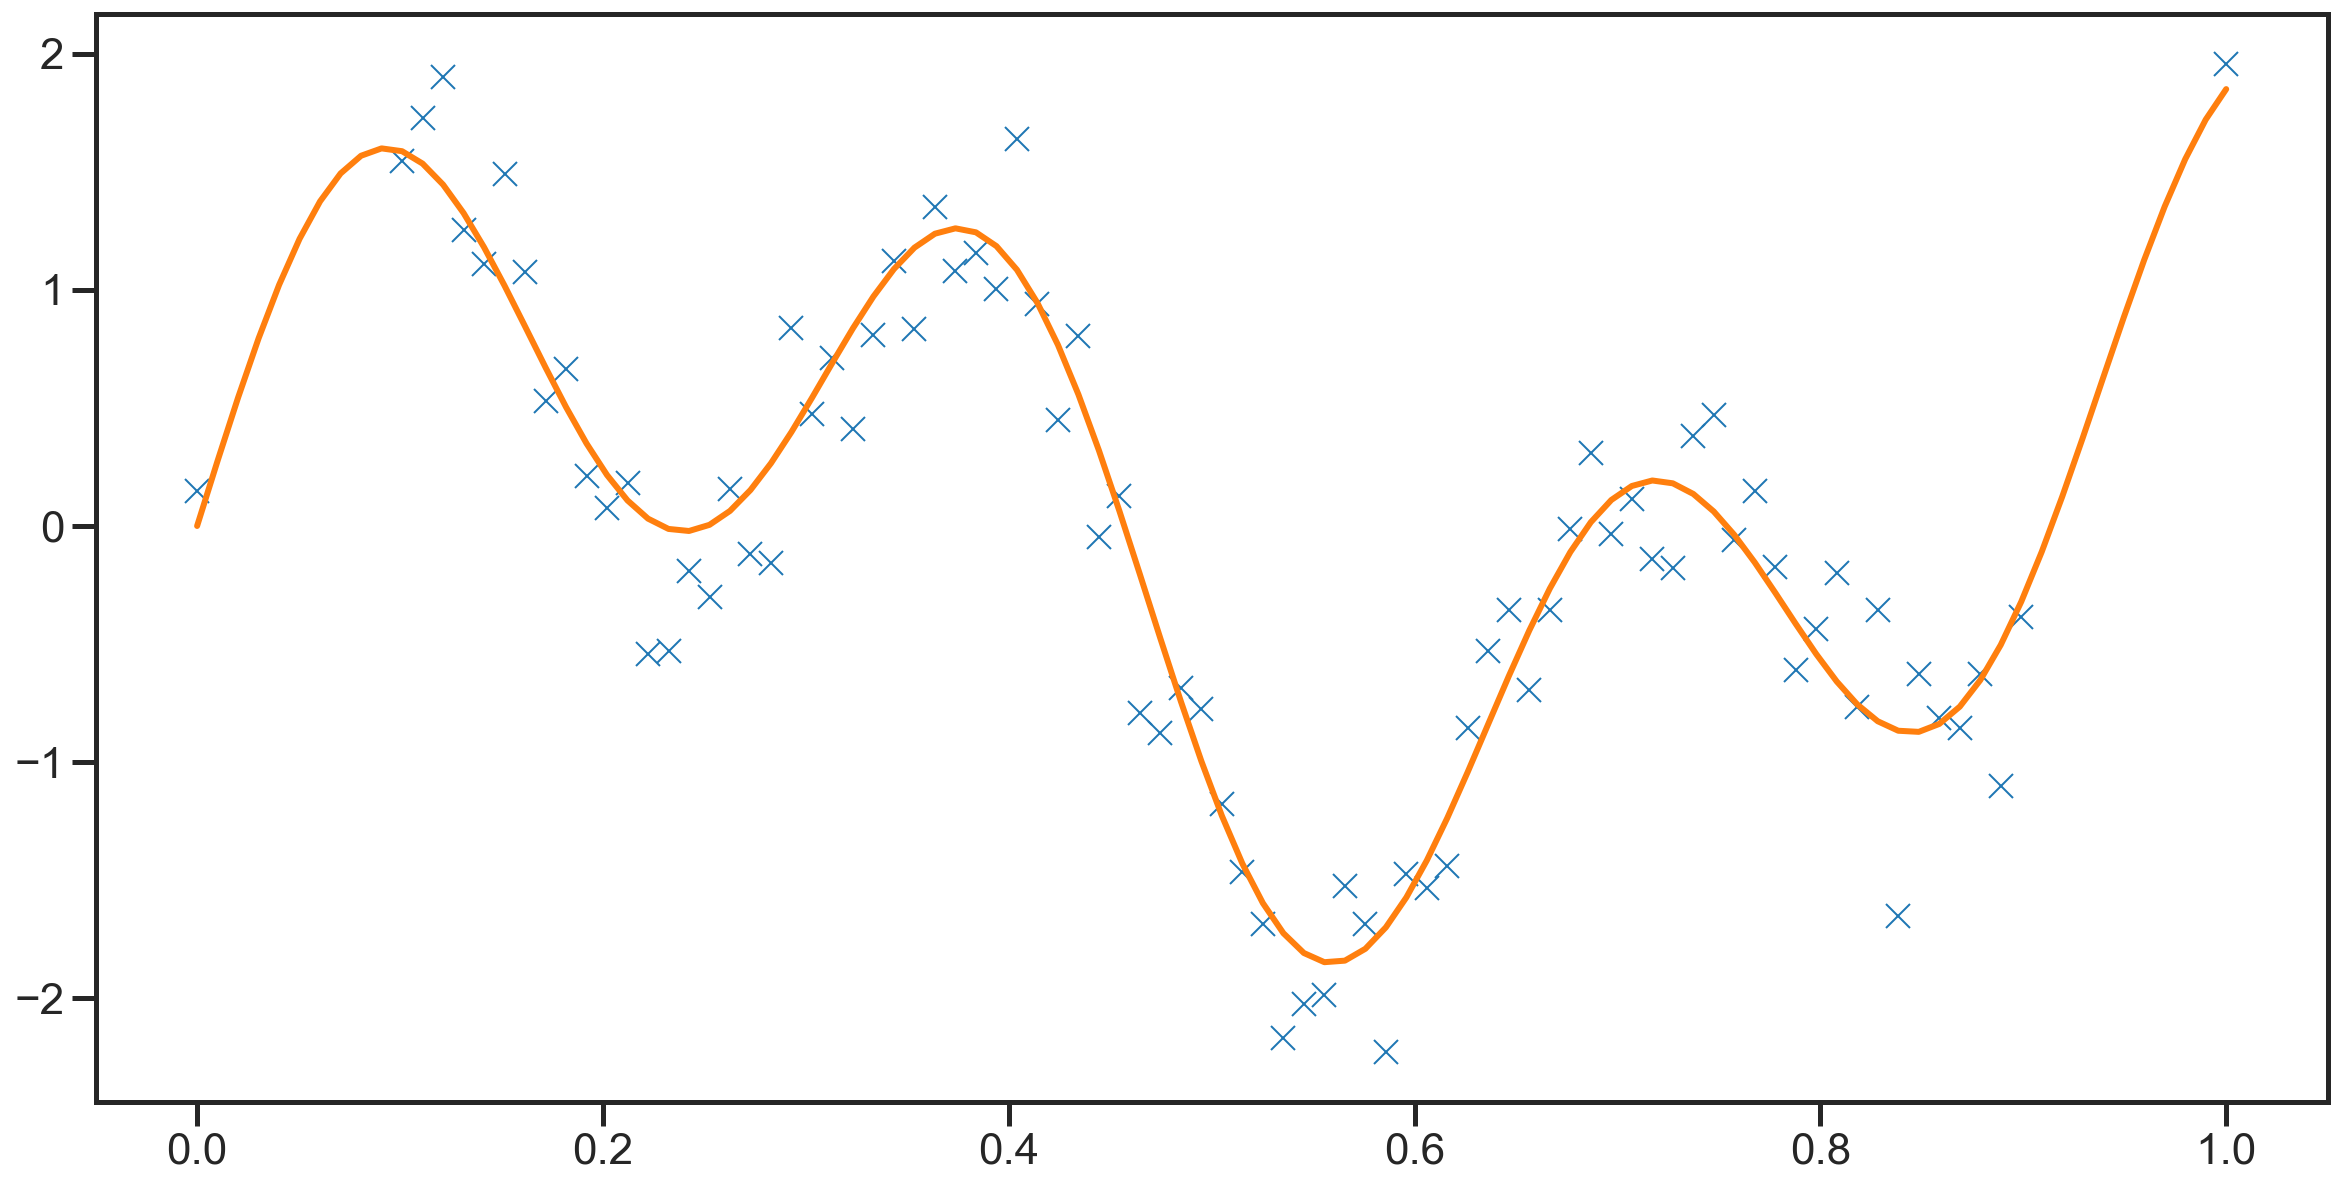

In [11]:
plt.plot(X,y,'x')
plt.plot(X_long,y_long)

In [12]:
model = SimpleModel()

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 2439.26it/s]


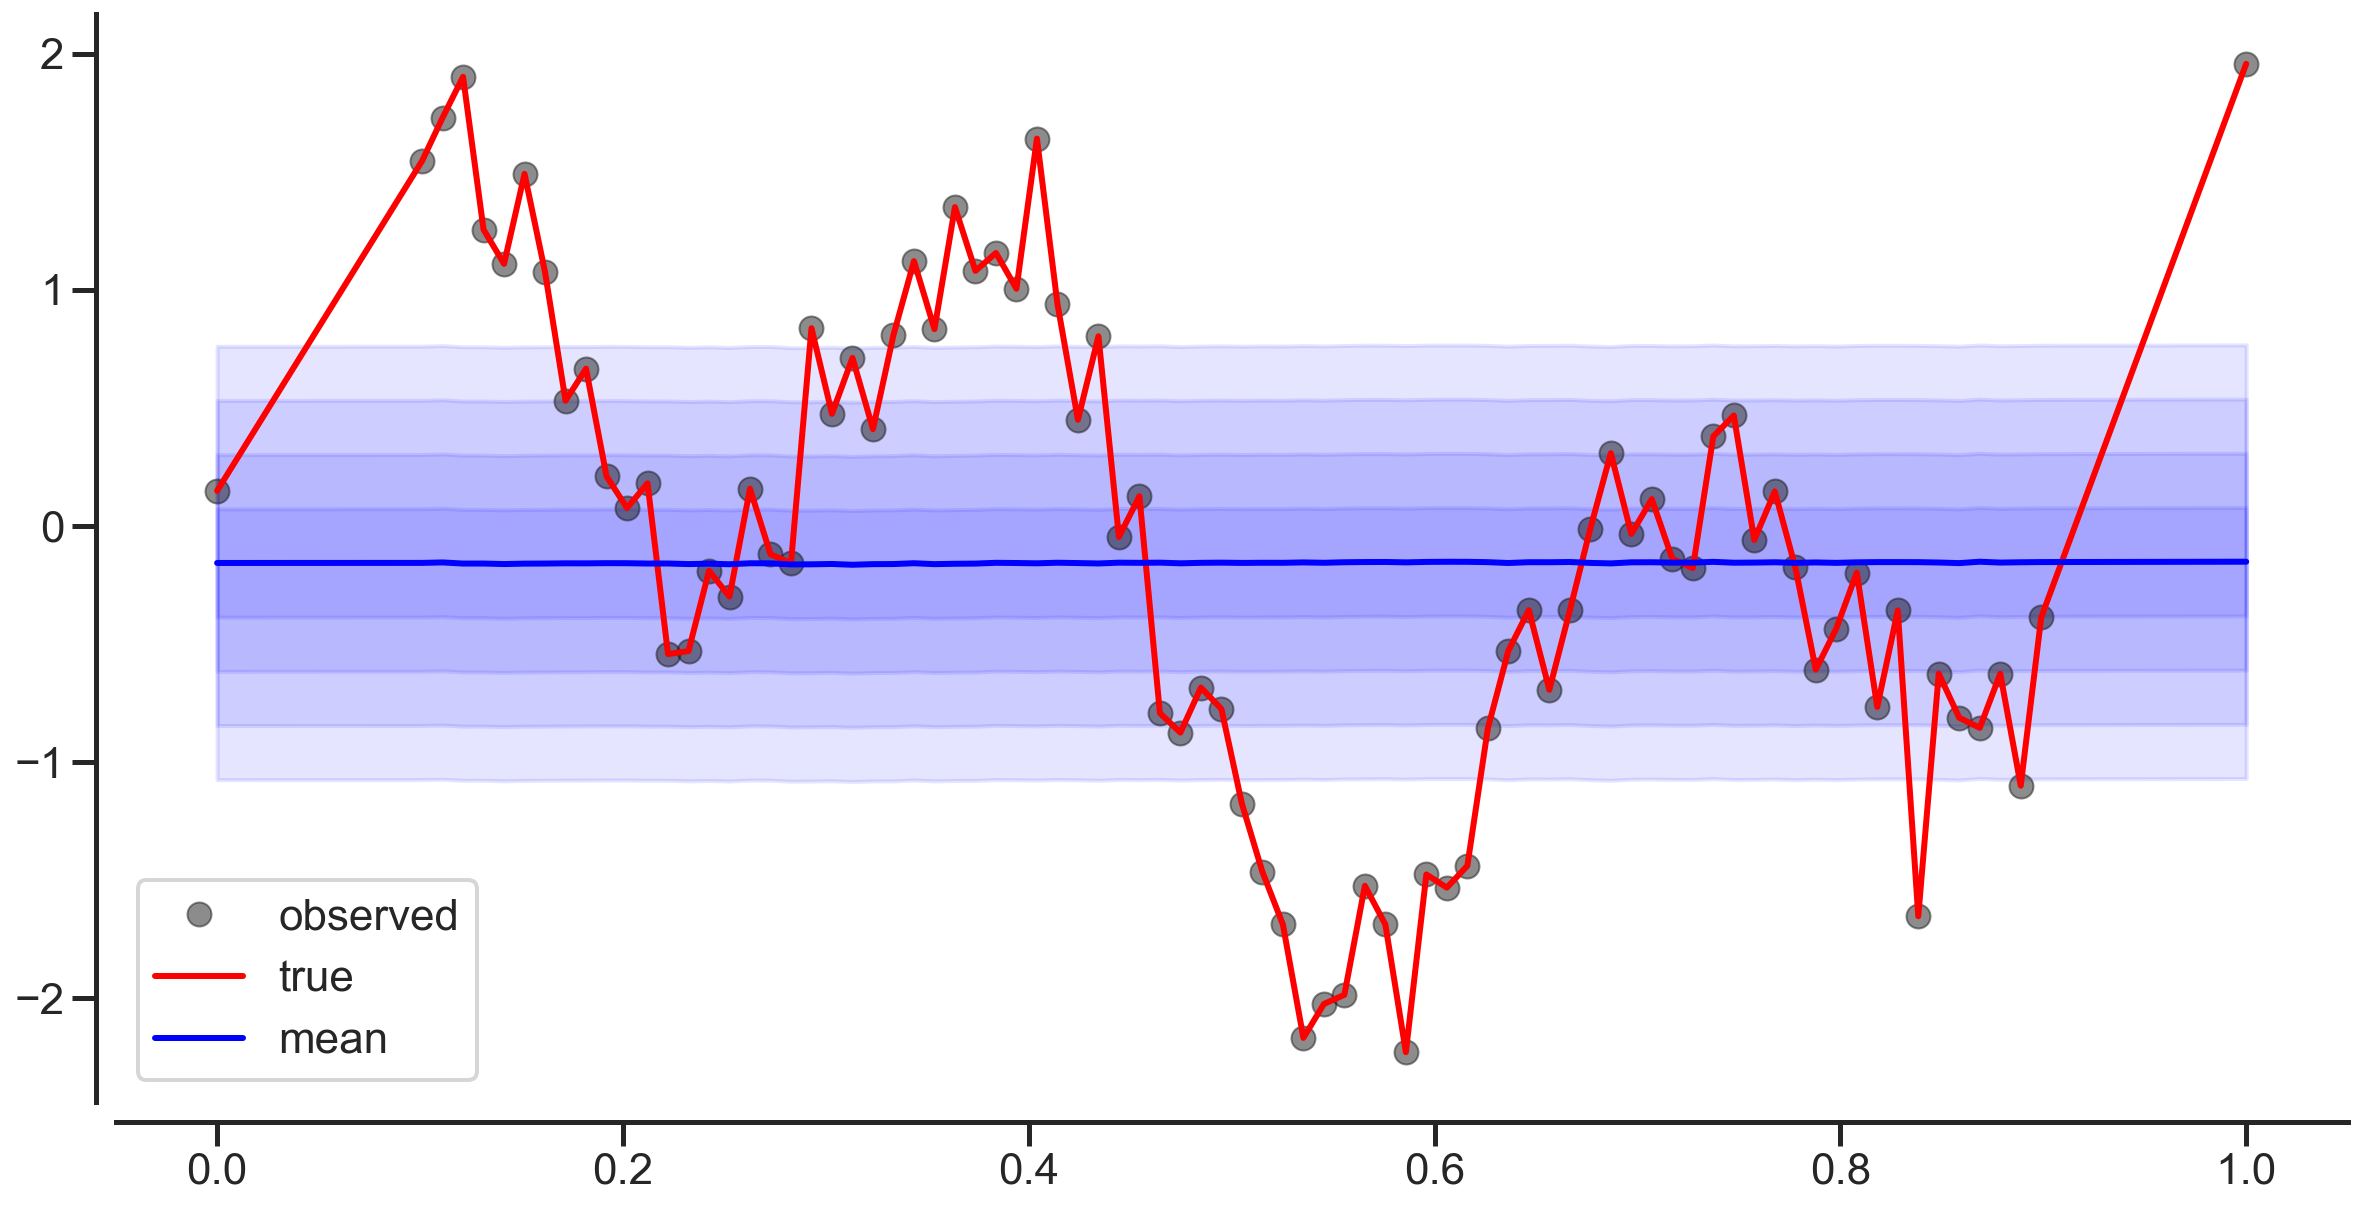

In [13]:


fig, ax = plt.subplots(1,1)
y_mean, y_std = model.uncertainty_function(X, iters, l2=l2)
    
ax.plot(X, y, ls="none", marker="o", color="0.1", alpha=0.5, label="observed")
ax.plot(X, y, ls="-", color="r", label="true")
ax.plot(X, y_mean, ls="-", color="b", label="mean")

for i in range(n_std):
    ax.fill_between(
        X.squeeze(),
        y_mean.squeeze() - y_std.squeeze() * ((i+1)/2),
        y_mean.squeeze() + y_std.squeeze() * ((i+1)/2),
        color="b",
        alpha=0.1
    )
ax.legend()
sns.despine(offset=10)


In [14]:
%%time


for i in trange(epochs):

    model.fit_model(X,y)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:14<00:00, 703.48it/s]


Wall time: 14.2 s


100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1408.48it/s]


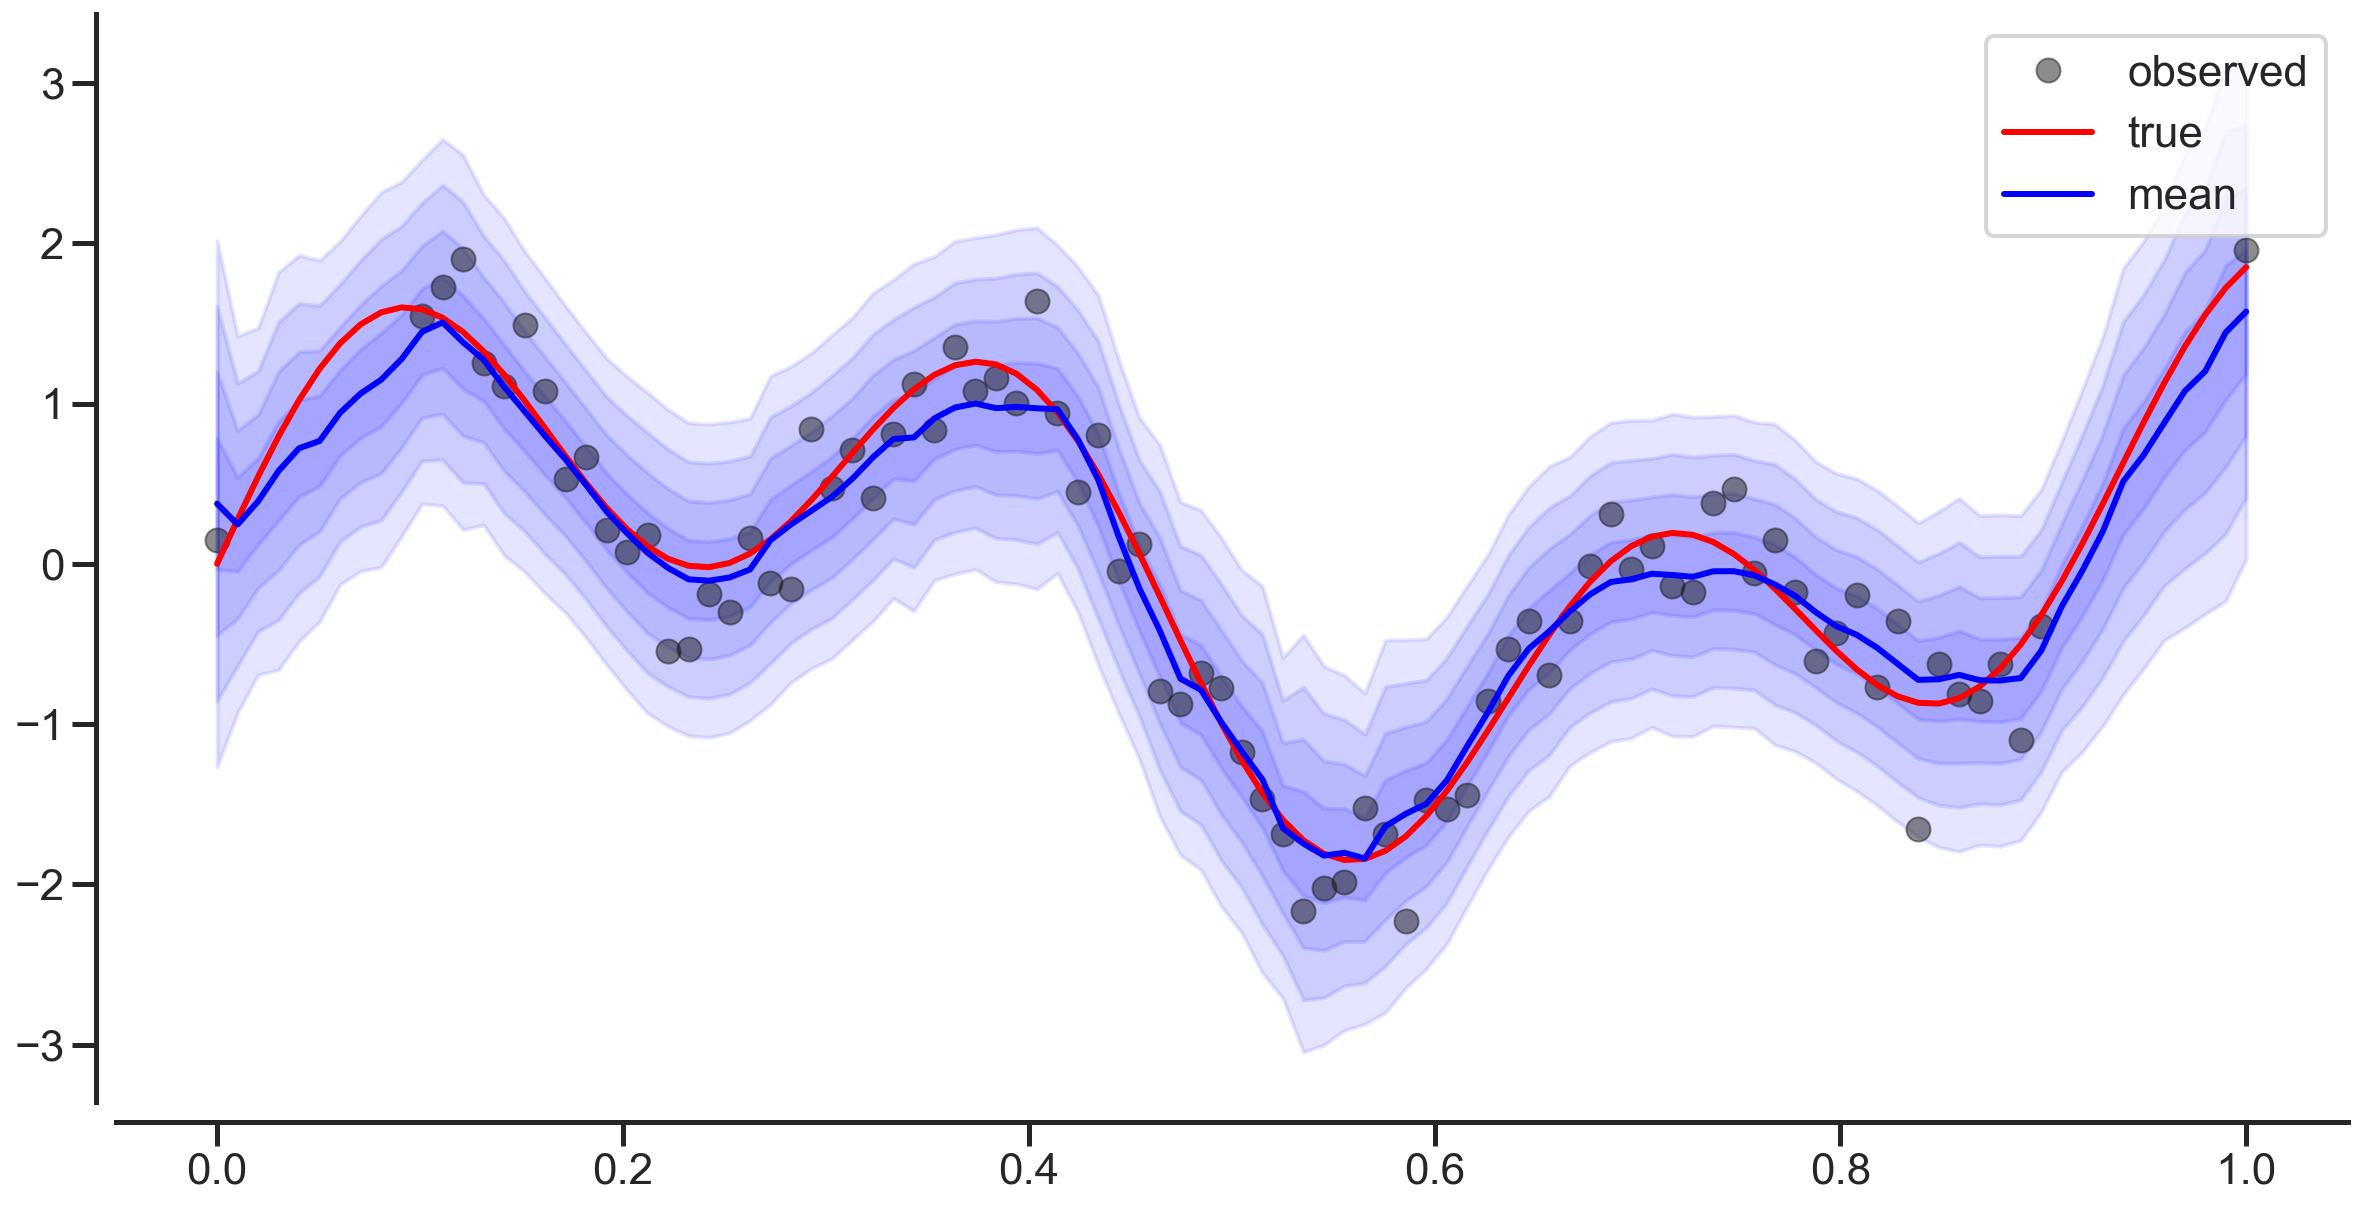

In [15]:

iters = 100
l2 = 1
n_std = 4


fig, ax = plt.subplots(1,1)
y_mean, y_std = model.uncertainty_function(X_long, iters, l2=l2)
y_mean_raw, y_std_raw = model.uncertainty_function(X_long, iters, l2=l2,raw_var=True)


ax.plot(X, y, ls="none", marker="o", color="0.1", alpha=0.5, label="observed")
ax.plot(X_long, y_long, ls="-", color="r", label="true")
ax.plot(X_long, y_mean, ls="-", color="b", label="mean")

for i in range(n_std):
    ax.fill_between(
        X_long.squeeze(),
        y_mean.squeeze() - y_std.squeeze() * ((i+1)/2),
        y_mean.squeeze() + y_std.squeeze() * ((i+1)/2),
        color="b",
        alpha=0.1
    )
    
    
    

ax.legend()
sns.despine(offset=10)

100%|██████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 1136.34it/s]


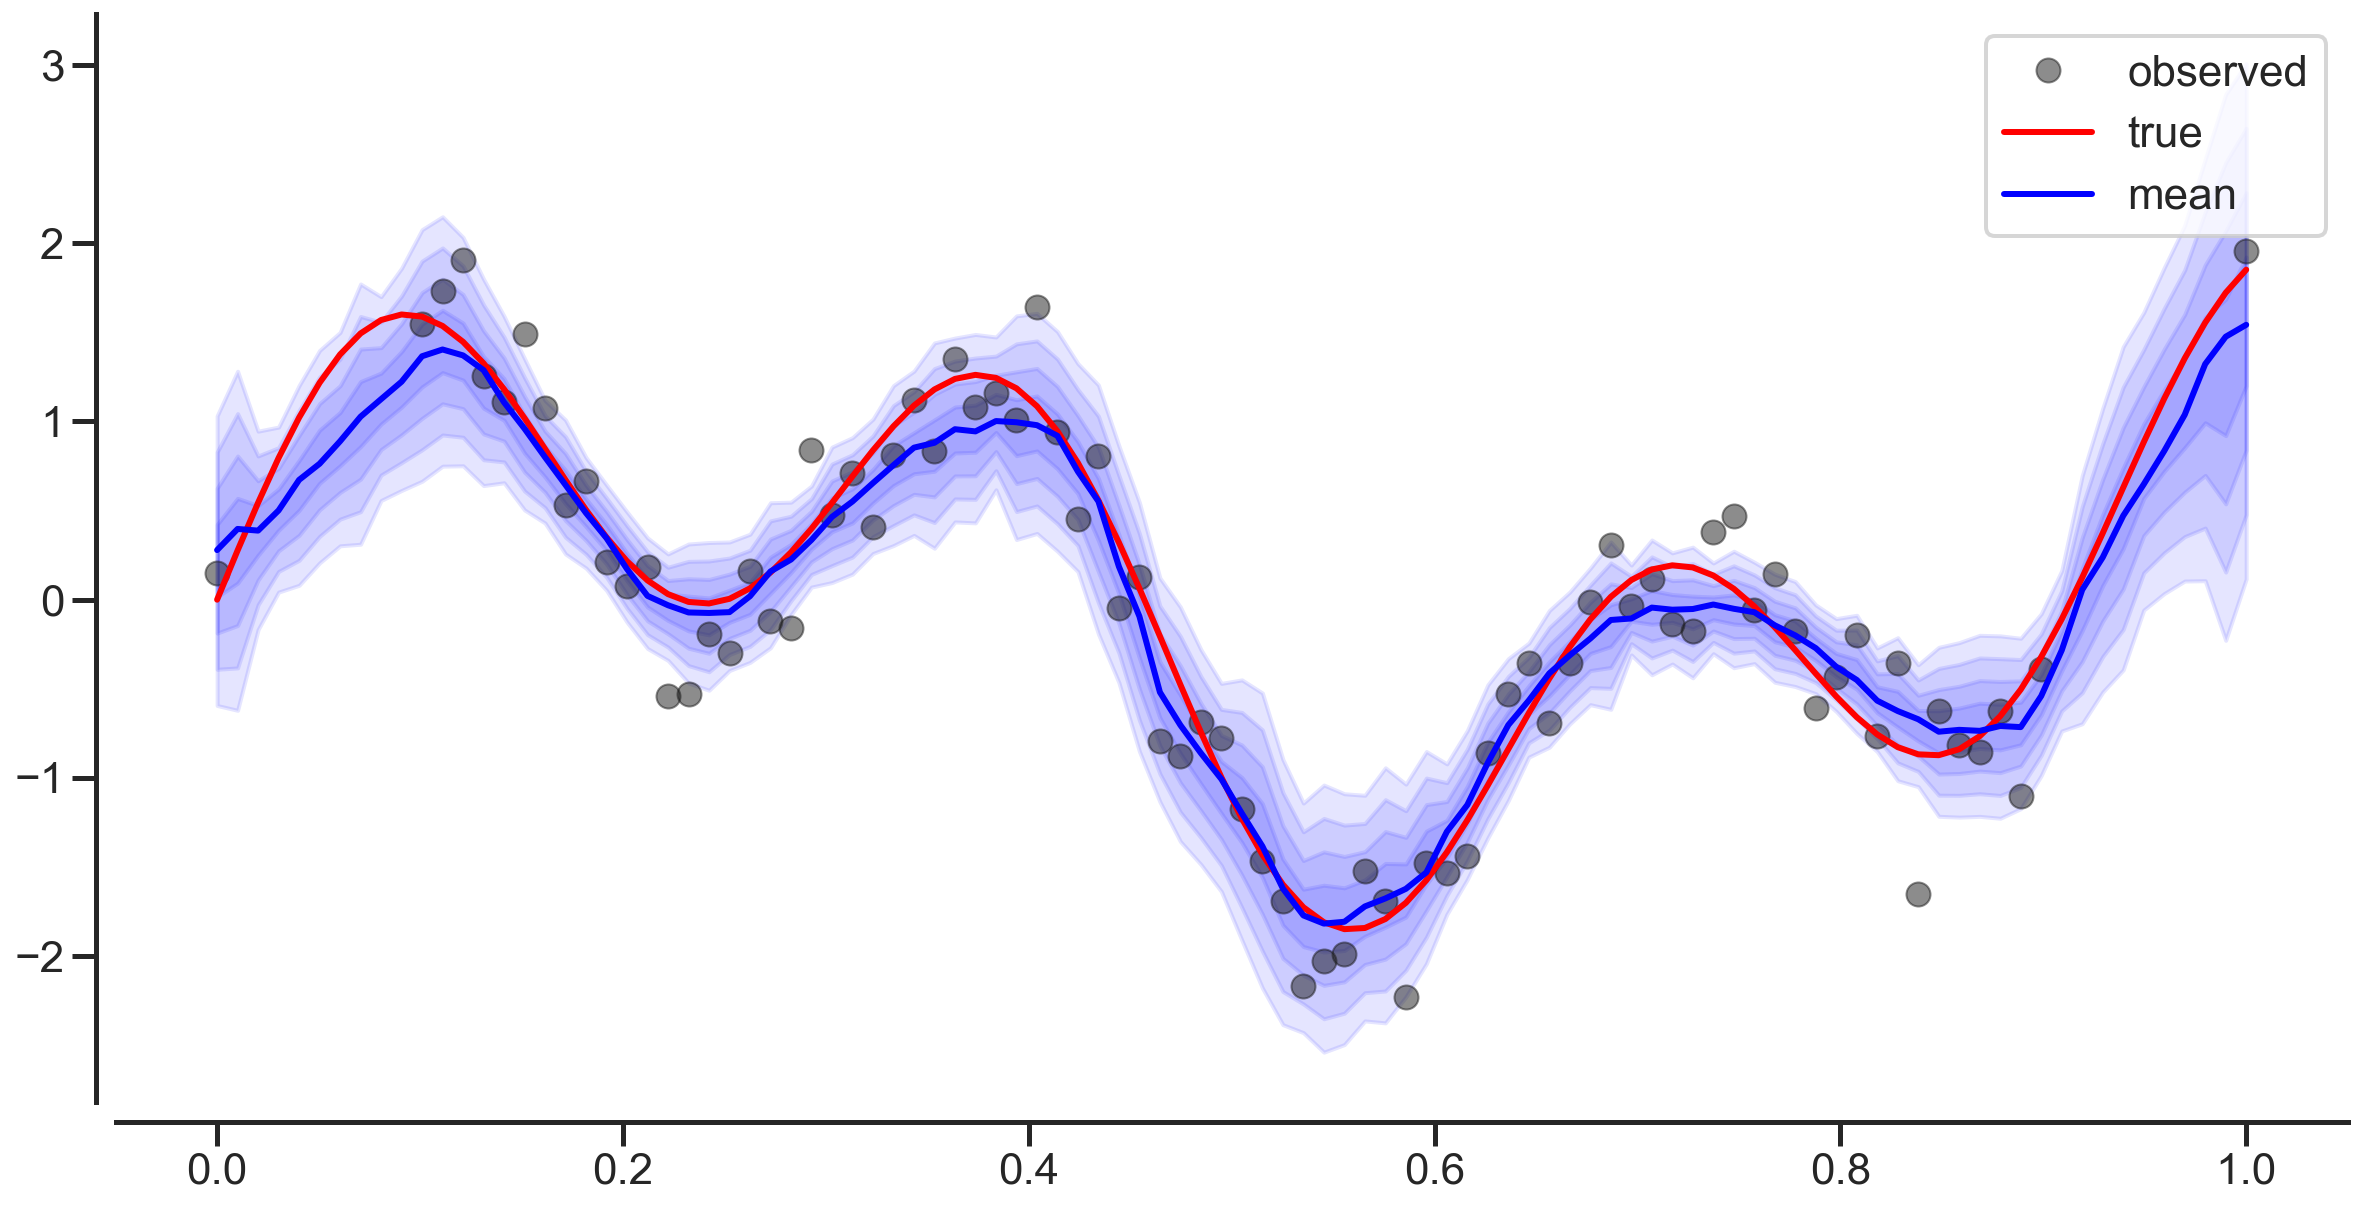

In [16]:
#raw uncretainty from ensemble

fig, ax = plt.subplots(1,1)
y_mean, y_std = model.uncertainty_function(X_long, iters, l2=l2)
y_mean_raw, y_std_raw = model.uncertainty_function(X_long, iters, l2=l2,raw_var=True)


ax.plot(X, y, ls="none", marker="o", color="0.1", alpha=0.5, label="observed")
ax.plot(X_long, y_long, ls="-", color="r", label="true")
ax.plot(X_long, y_mean, ls="-", color="b", label="mean")


    
    
for i in range(n_std):
    ax.fill_between(
        X_long.squeeze(),
        y_mean_raw.squeeze() - y_std_raw.squeeze() * ((i+1)/2),
        y_mean_raw.squeeze() + y_std_raw.squeeze() * ((i+1)/2),
        color="b",
        alpha=0.1
    )
    
ax.legend()
sns.despine(offset=10)

# Ensembles


In [17]:
 
    
from models.models import VanillaEnsemble


In [18]:
vanilla = VanillaEnsemble(dataset_lenght = len(X))

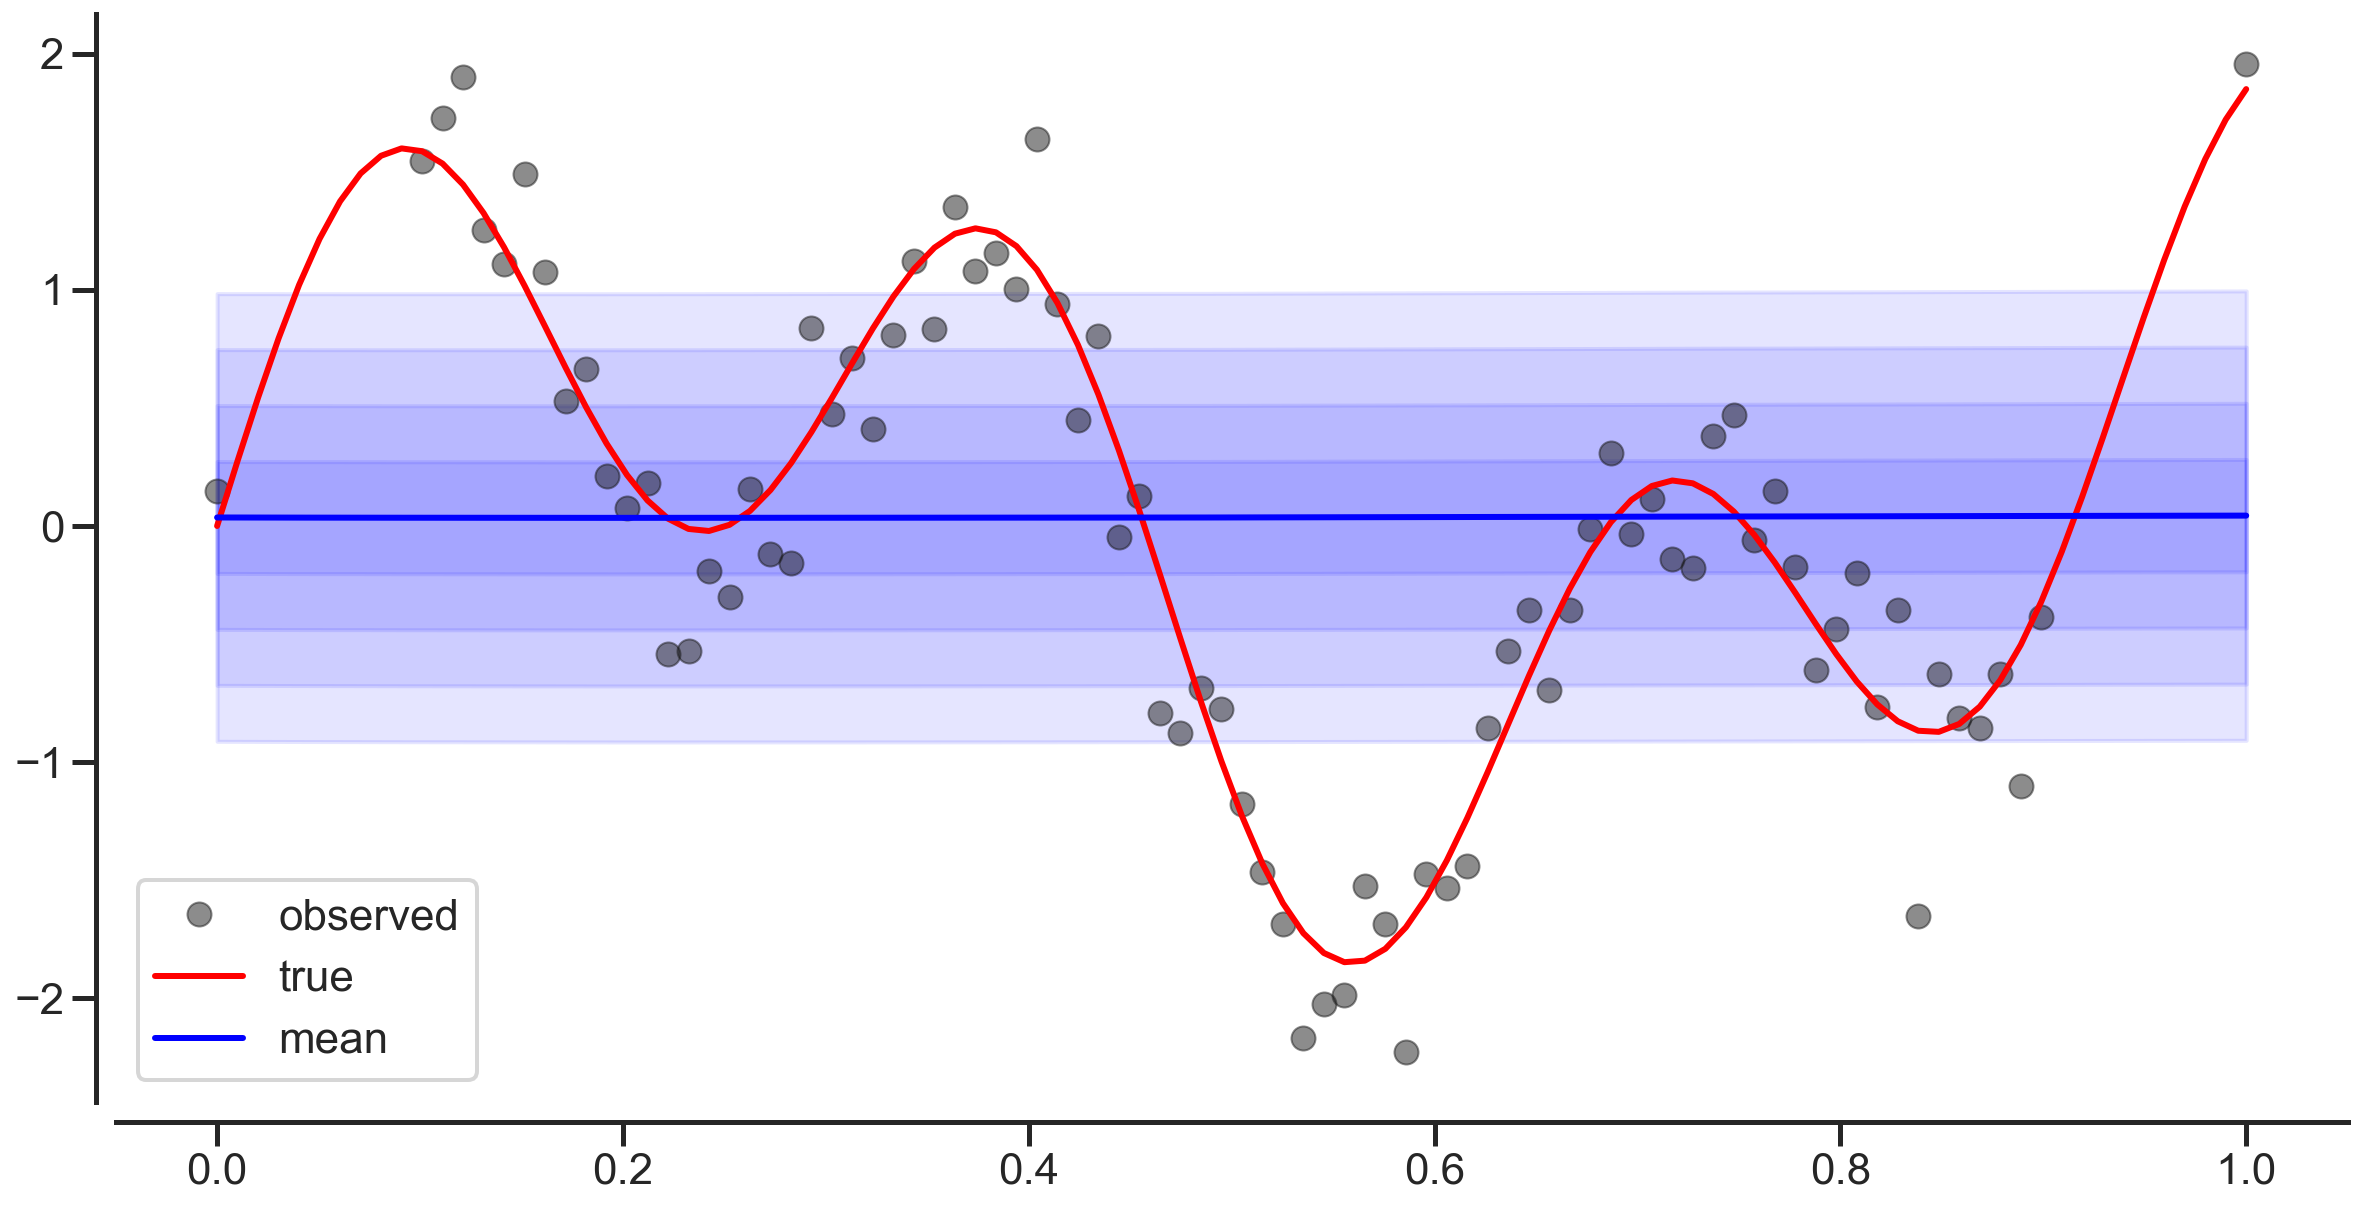

In [19]:
fig, ax = plt.subplots(1,1)
y_mean, y_std = vanilla.uncertainty_function(X_long, iters, l2=l2)
#y_mean_raw, y_std_raw = vanilla.uncertainty_function(X_long, iters, l2=l2,raw_var=True)


ax.plot(X, y, ls="none", marker="o", color="0.1", alpha=0.5, label="observed")
ax.plot(X_long, y_long, ls="-", color="r", label="true")
ax.plot(X_long, y_mean, ls="-", color="b", label="mean")


    
    
for i in range(n_std):
    ax.fill_between(
        X_long.squeeze(),
        y_mean.squeeze() - y_std.squeeze() * ((i+1)/2),
        y_mean.squeeze() + y_std.squeeze() * ((i+1)/2),
        color="b",
        alpha=0.1
    )
    
ax.legend()
sns.despine(offset=10)

In [20]:
%%time


for i in trange(epochs):

    vanilla.fit_model(X,y)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:24<00:00, 69.27it/s]


Wall time: 2min 24s


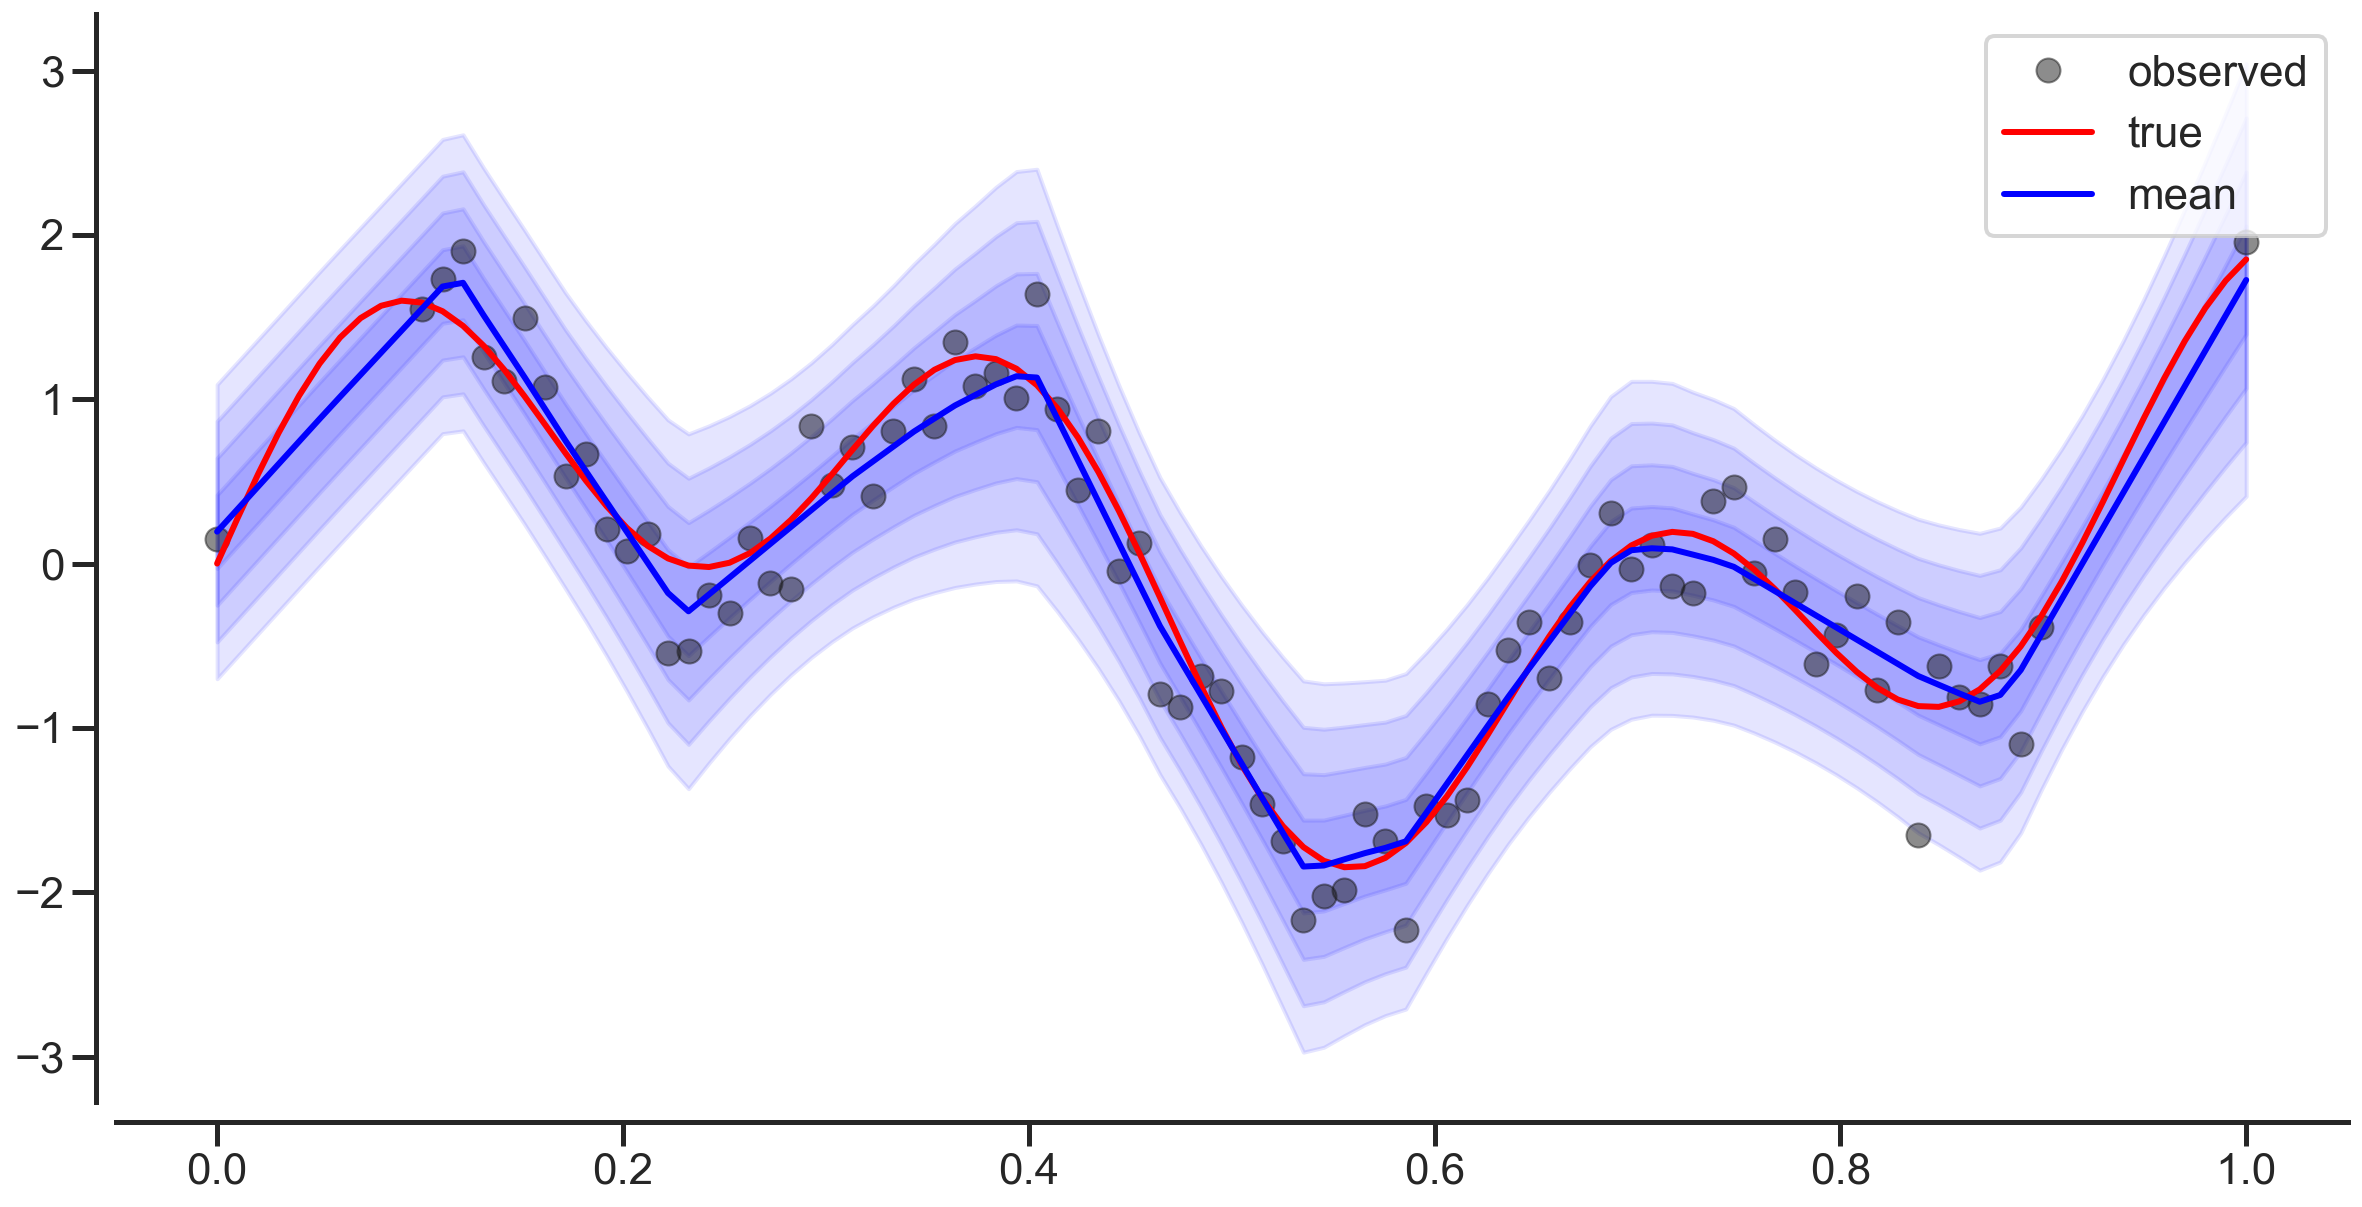

In [21]:
fig, ax = plt.subplots(1,1)
y_mean, y_std = vanilla.uncertainty_function(X_long, iters, l2=l2)
#y_mean_raw, y_std_raw = vanilla.uncertainty_function(X_long, iters, l2=l2,raw_var=True)


ax.plot(X, y, ls="none", marker="o", color="0.1", alpha=0.5, label="observed")
ax.plot(X_long, y_long, ls="-", color="r", label="true")
ax.plot(X_long, y_mean, ls="-", color="b", label="mean")


    
    
for i in range(n_std):
    ax.fill_between(
        X_long.squeeze(),
        y_mean.squeeze() - y_std.squeeze() * ((i+1)/2),
        y_mean.squeeze() + y_std.squeeze() * ((i+1)/2),
        color="b",
        alpha=0.1
    )
    
ax.legend()
sns.despine(offset=10)

## Shuffle Ensemble

In [22]:
from models.models import ShuffleEnsemble



In [23]:
shuffle = ShuffleEnsemble()

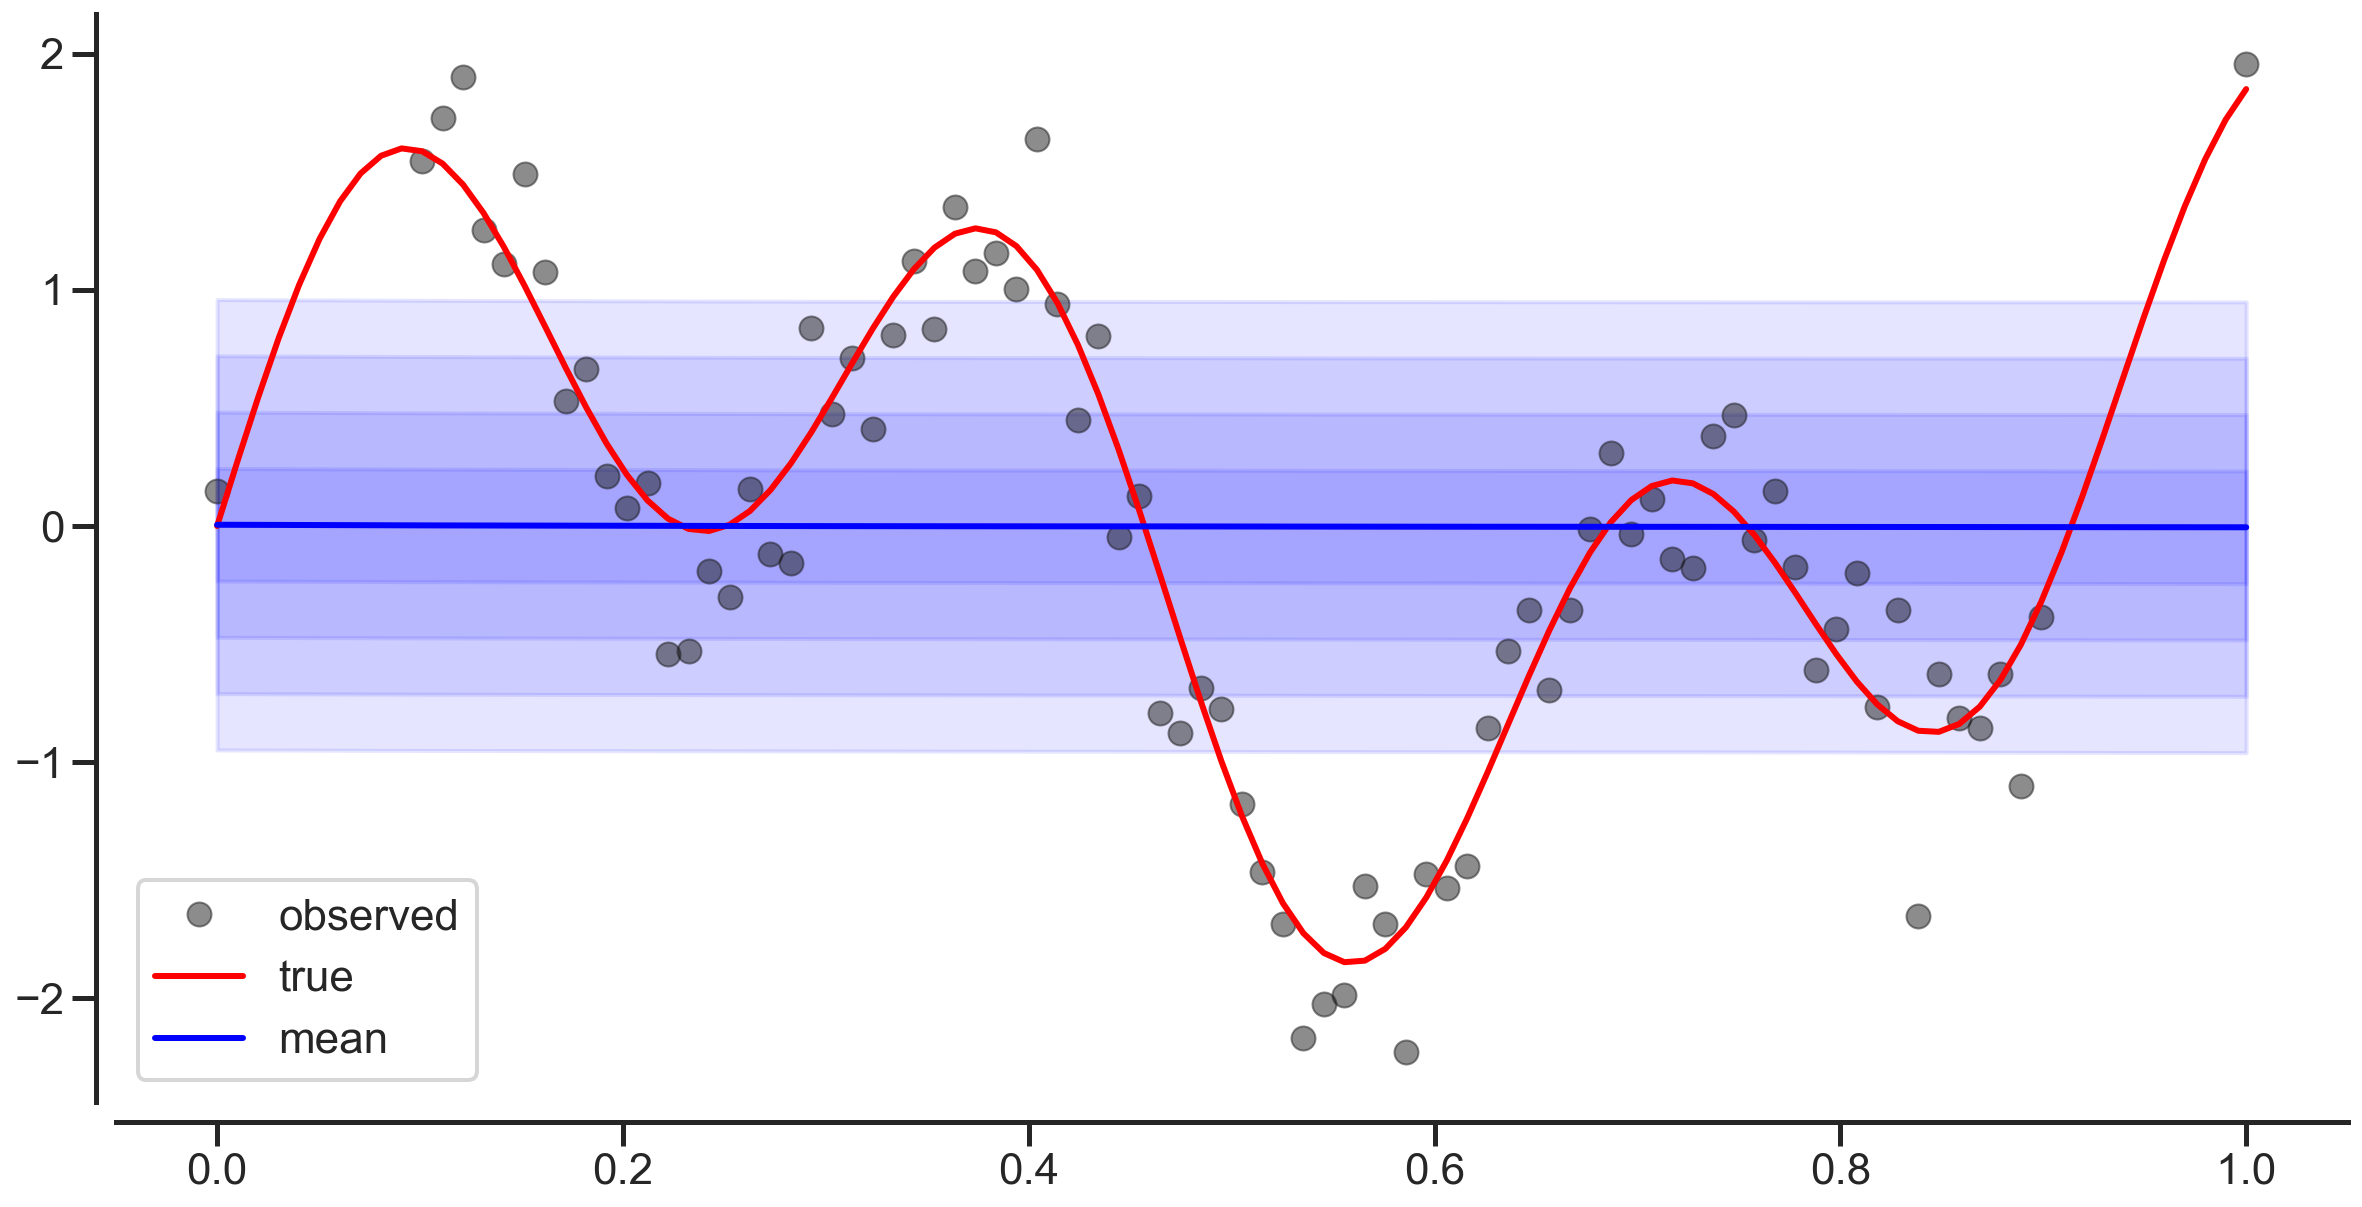

In [24]:
fig, ax = plt.subplots(1,1)
y_mean, y_std = shuffle.uncertainty_function(X_long, iters, l2=l2)
#y_mean_raw, y_std_raw = vanilla.uncertainty_function(X_long, iters, l2=l2,raw_var=True)


ax.plot(X, y, ls="none", marker="o", color="0.1", alpha=0.5, label="observed")
ax.plot(X_long, y_long, ls="-", color="r", label="true")
ax.plot(X_long, y_mean, ls="-", color="b", label="mean")


    
    
for i in range(n_std):
    ax.fill_between(
        X_long.squeeze(),
        y_mean.squeeze() - y_std.squeeze() * ((i+1)/2),
        y_mean.squeeze() + y_std.squeeze() * ((i+1)/2),
        color="b",
        alpha=0.1
    )
    
ax.legend()
sns.despine(offset=10)

In [25]:
%%time


for i in trange(epochs):

    shuffle.fit_model(X,y)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:22<00:00, 69.93it/s]


Wall time: 2min 22s


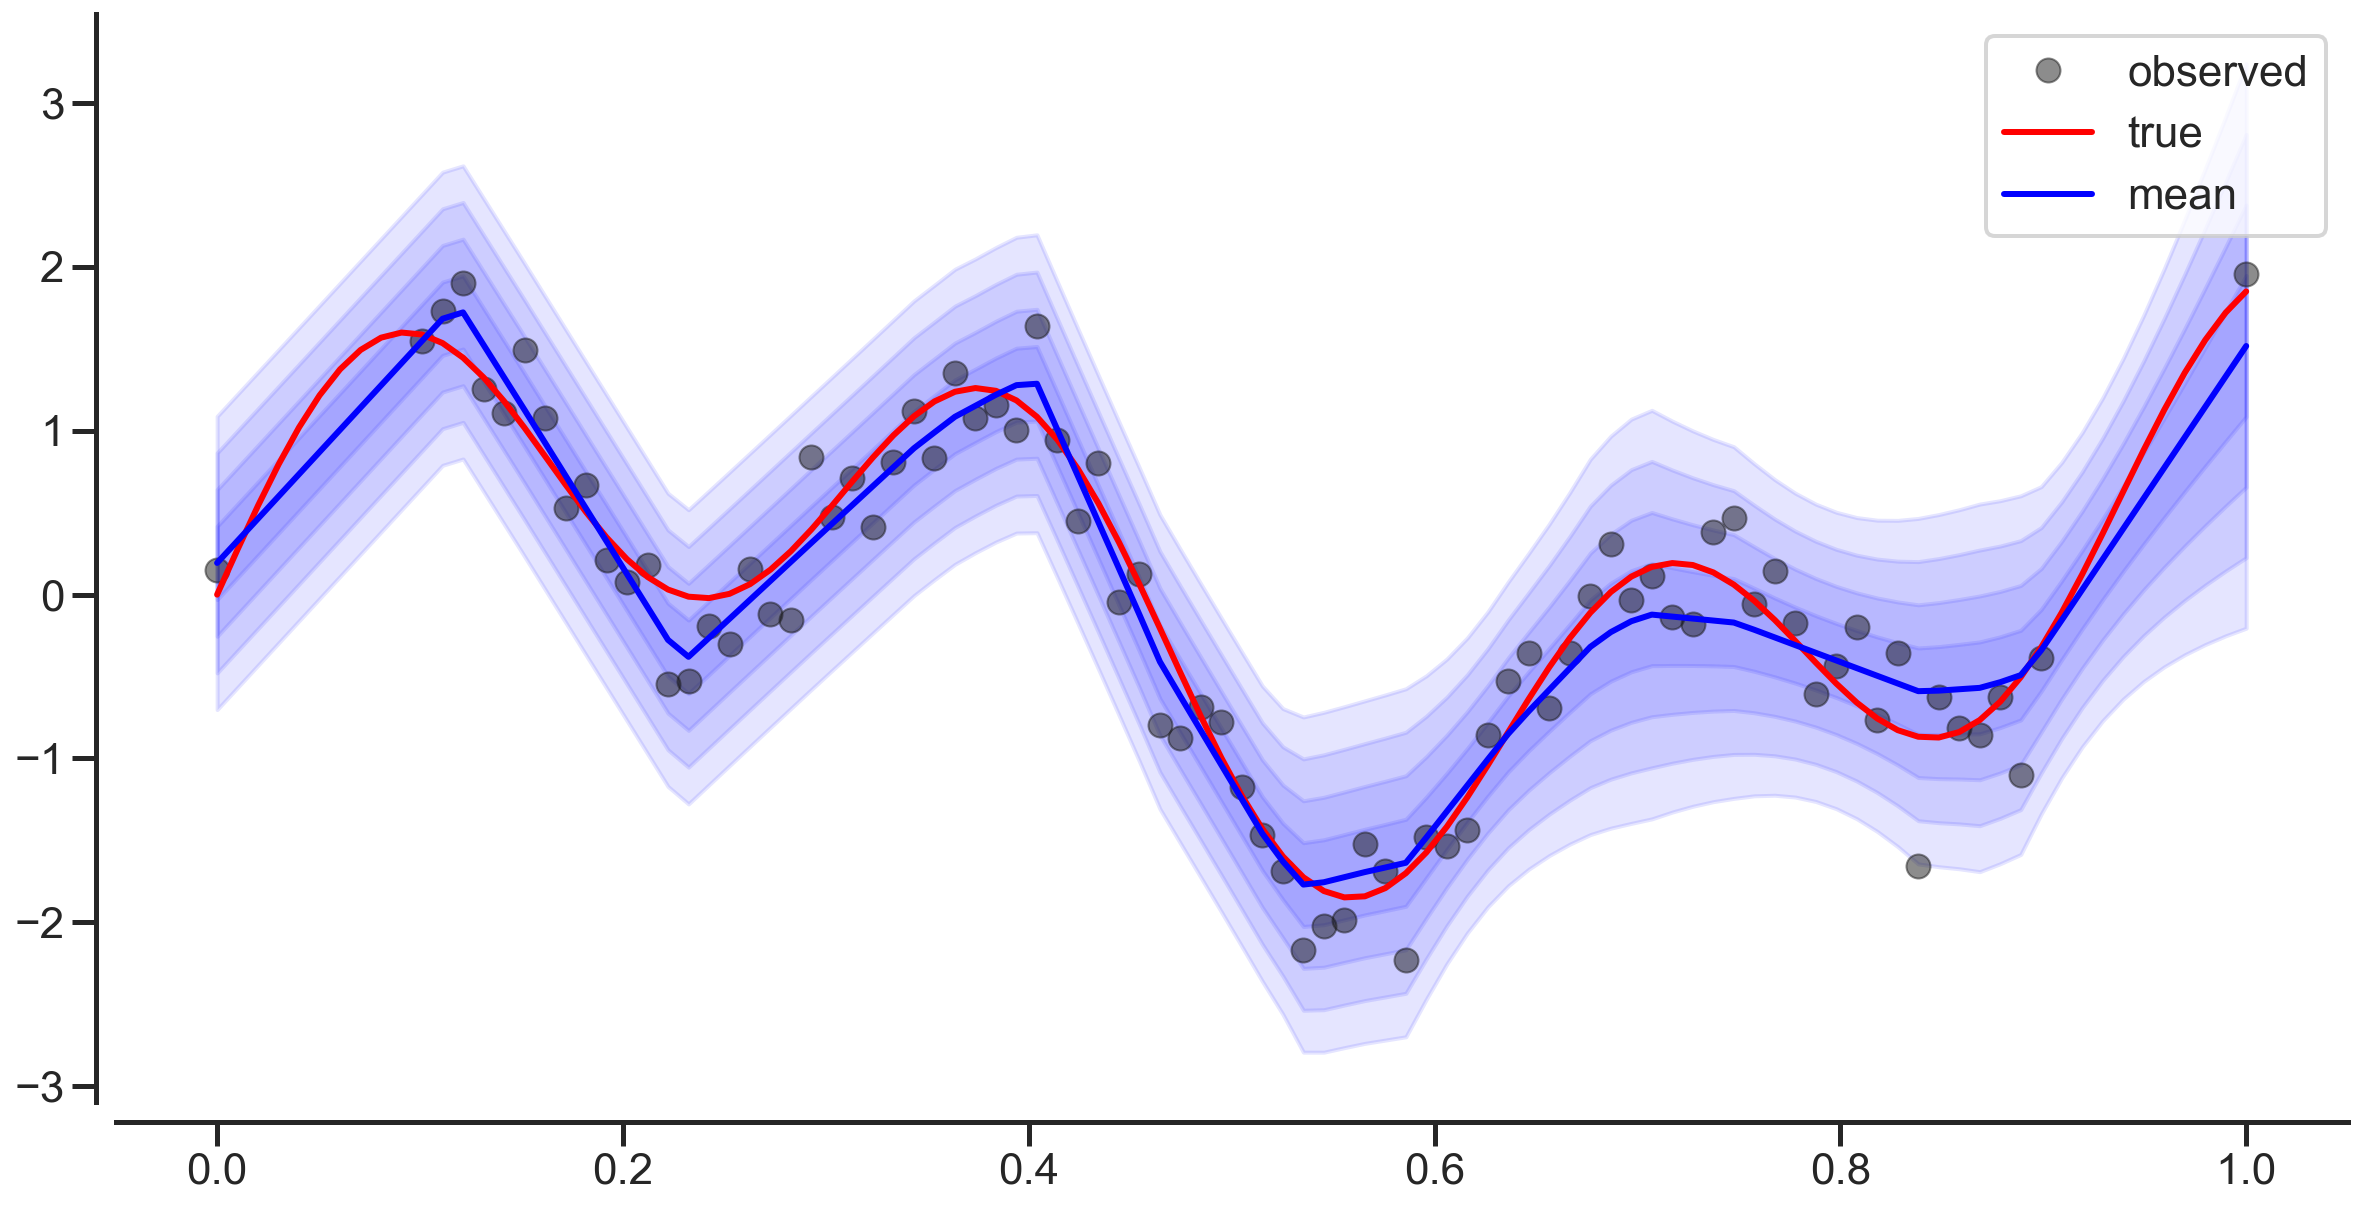

In [26]:
fig, ax = plt.subplots(1,1)
y_mean, y_std = shuffle.uncertainty_function(X_long, iters, l2=l2)
#y_mean_raw, y_std_raw = vanilla.uncertainty_function(X_long, iters, l2=l2,raw_var=True)


ax.plot(X, y, ls="none", marker="o", color="0.1", alpha=0.5, label="observed")
ax.plot(X_long, y_long, ls="-", color="r", label="true")
ax.plot(X_long, y_mean, ls="-", color="b", label="mean")


    
    
for i in range(n_std):
    ax.fill_between(
        X_long.squeeze(),
        y_mean.squeeze() - y_std.squeeze() * ((i+1)/2),
        y_mean.squeeze() + y_std.squeeze() * ((i+1)/2),
        color="b",
        alpha=0.1
    )
    
ax.legend()
sns.despine(offset=10)

## Bootstrapensemble

In [27]:
from models.models import BootstrapEnsemble


In [28]:
bootstrap = BootstrapEnsemble(dataset_lenght = len(X))

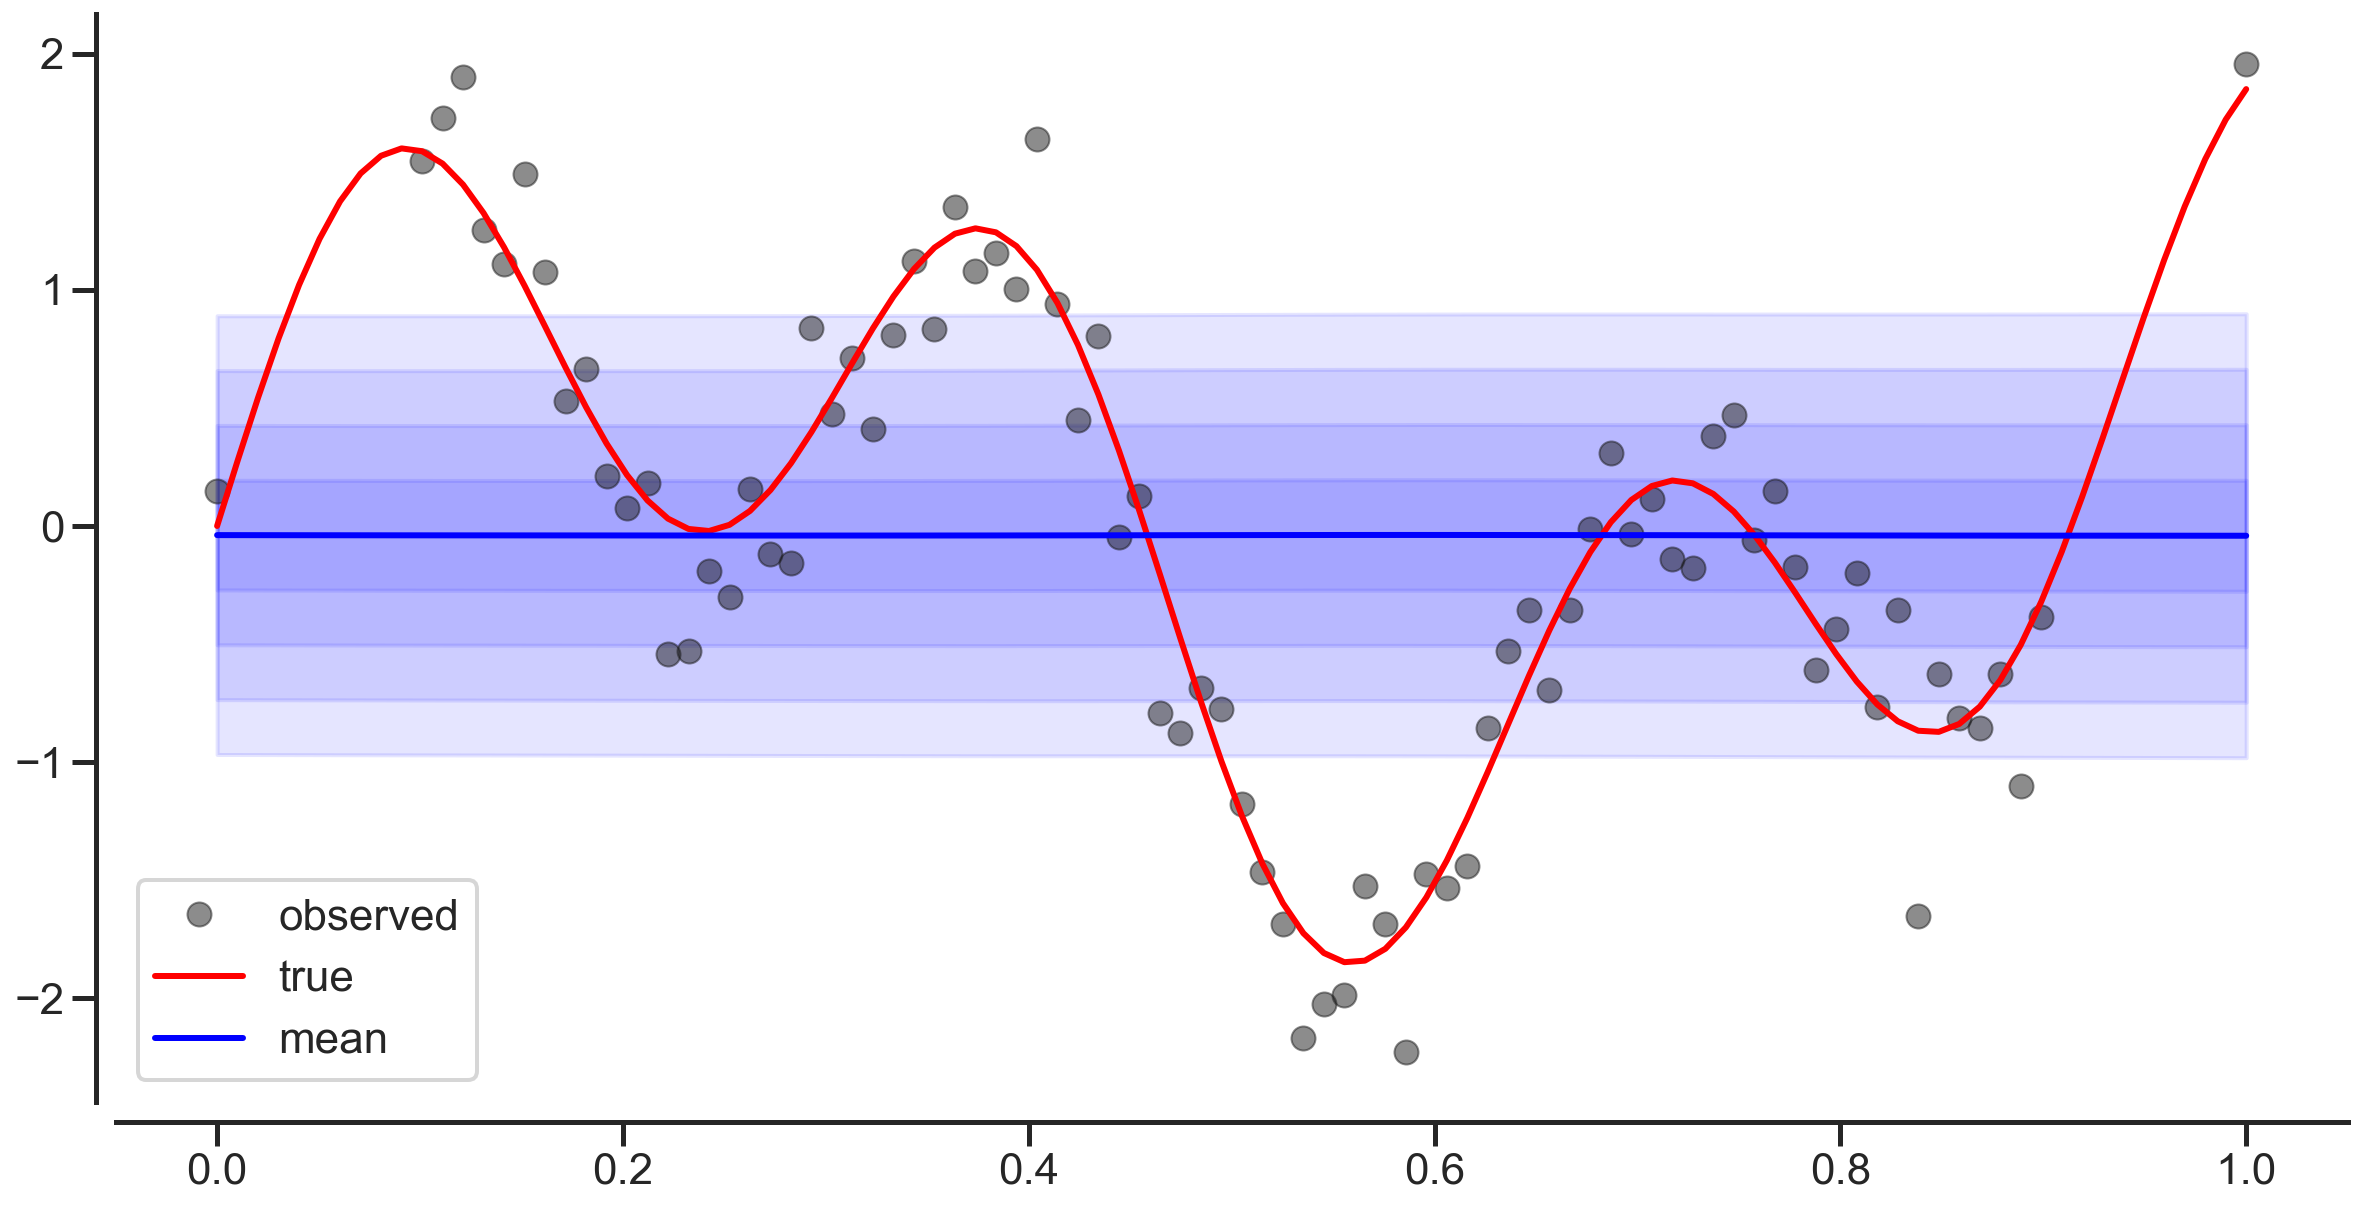

In [29]:
fig, ax = plt.subplots(1,1)
y_mean, y_std = bootstrap.uncertainty_function(X_long, iters, l2=l2)
#y_mean_raw, y_std_raw = vanilla.uncertainty_function(X_long, iters, l2=l2,raw_var=True)


ax.plot(X, y, ls="none", marker="o", color="0.1", alpha=0.5, label="observed")
ax.plot(X_long, y_long, ls="-", color="r", label="true")
ax.plot(X_long, y_mean, ls="-", color="b", label="mean")


    
    
for i in range(n_std):
    ax.fill_between(
        X_long.squeeze(),
        y_mean.squeeze() - y_std.squeeze() * ((i+1)/2),
        y_mean.squeeze() + y_std.squeeze() * ((i+1)/2),
        color="b",
        alpha=0.1
    )
    
ax.legend()
sns.despine(offset=10)

In [30]:
%%time


for i in trange(epochs):

    bootstrap.fit_model(X,y)

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [02:31<00:00, 66.16it/s]


Wall time: 2min 31s


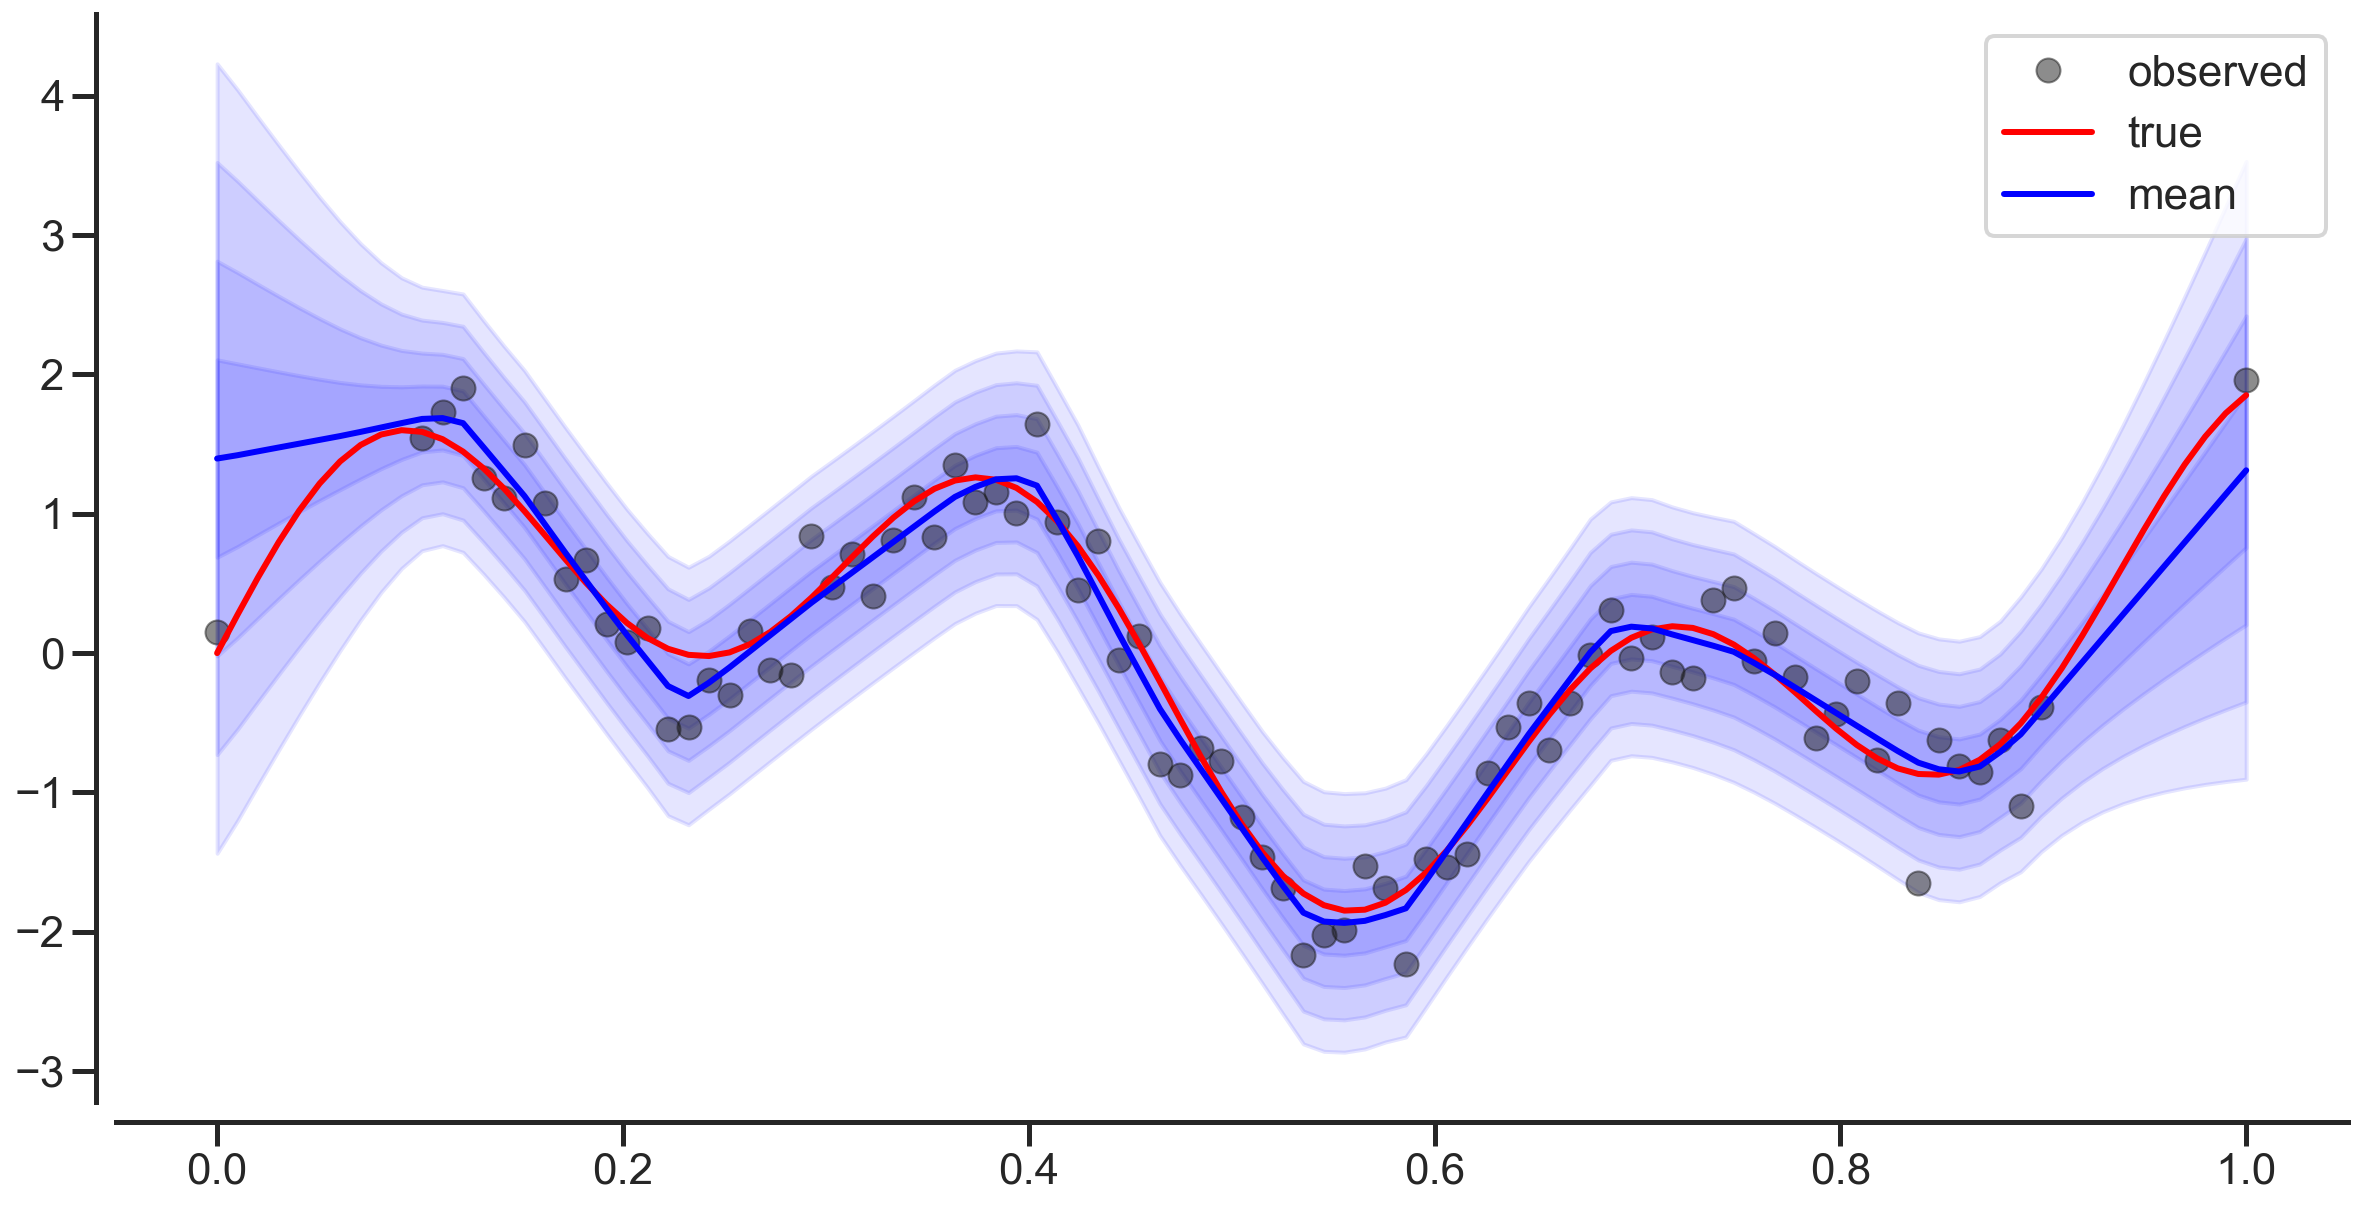

In [31]:
fig, ax = plt.subplots(1,1)
y_mean, y_std = bootstrap.uncertainty_function(X_long, iters, l2=l2)
#y_mean_raw, y_std_raw = vanilla.uncertainty_function(X_long, iters, l2=l2,raw_var=True)


ax.plot(X, y, ls="none", marker="o", color="0.1", alpha=0.5, label="observed")
ax.plot(X_long, y_long, ls="-", color="r", label="true")
ax.plot(X_long, y_mean, ls="-", color="b", label="mean")


    
    
for i in range(n_std):
    ax.fill_between(
        X_long.squeeze(),
        y_mean.squeeze() - y_std.squeeze() * ((i+1)/2),
        y_mean.squeeze() + y_std.squeeze() * ((i+1)/2),
        color="b",
        alpha=0.1
    )
    
ax.legend()
sns.despine(offset=10)

# Saver

In [32]:
from models.models import SaverModel

In [33]:
saver_model = SaverModel()

In [34]:
%%time


for i in trange(epochs):

    saver_model.fit_model(X,y)

100%|███████████████████████████████████████████████████████████████████████████| 10000/10000 [00:13<00:00, 716.12it/s]


Wall time: 14 s


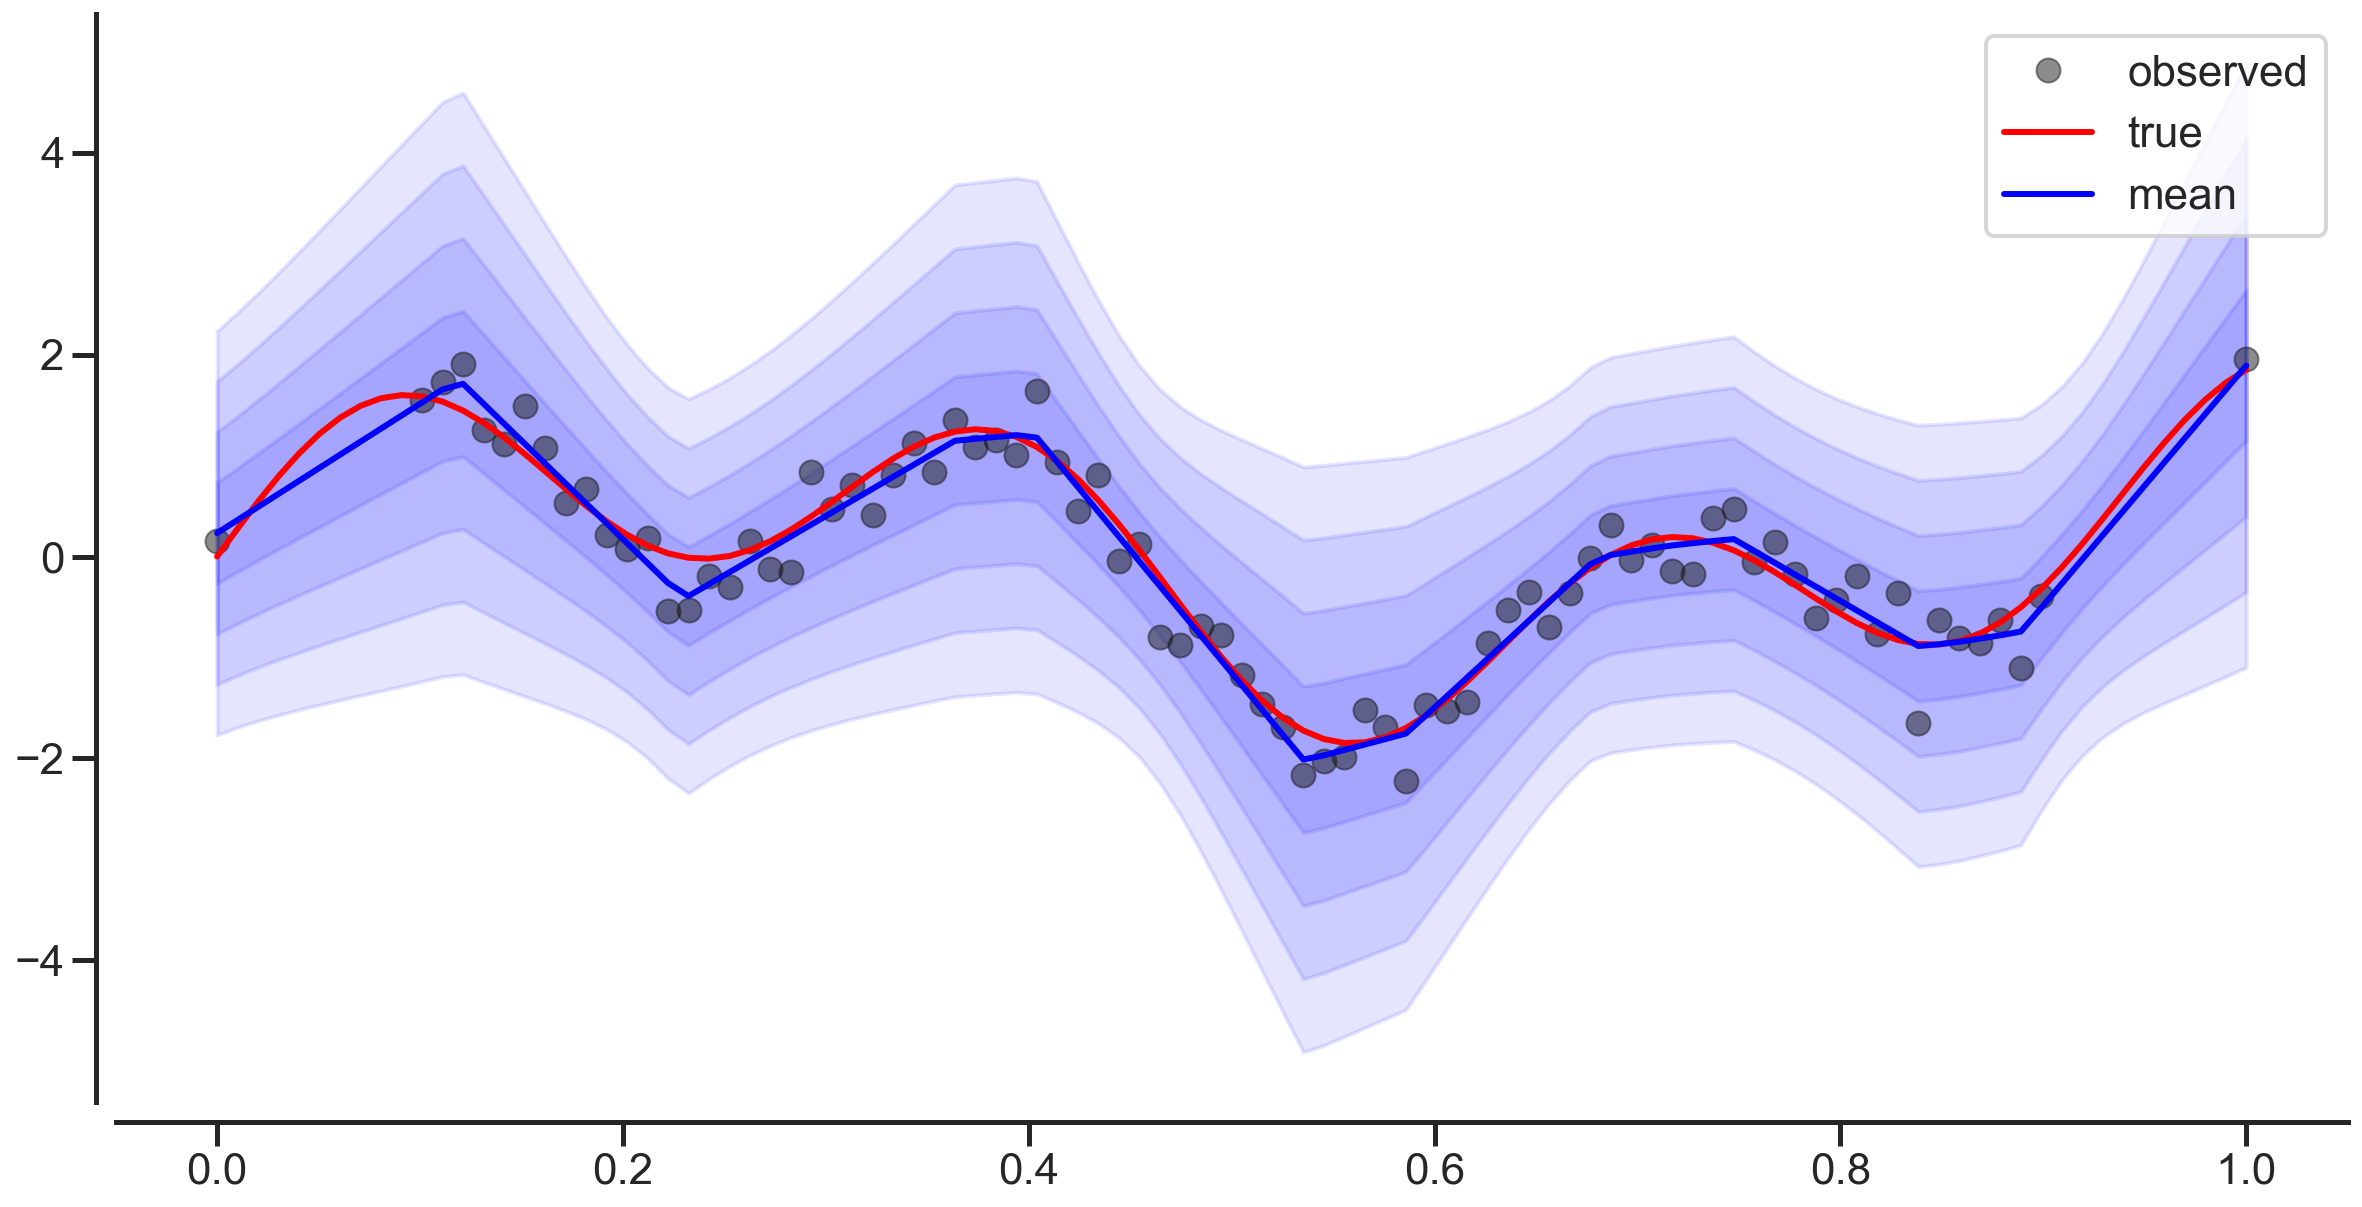

In [35]:
fig, ax = plt.subplots(1,1)
y_mean, y_std = saver_model.uncertainty_function(X_long, iters, l2=l2)
#y_mean_raw, y_std_raw = vanilla.uncertainty_function(X_long, iters, l2=l2,raw_var=True)


ax.plot(X, y, ls="none", marker="o", color="0.1", alpha=0.5, label="observed")
ax.plot(X_long, y_long, ls="-", color="r", label="true")
ax.plot(X_long, y_mean, ls="-", color="b", label="mean")


    
    
for i in range(n_std):
    ax.fill_between(
        X_long.squeeze(),
        y_mean.squeeze() - y_std.squeeze() * ((i+1)/2),
        y_mean.squeeze() + y_std.squeeze() * ((i+1)/2),
        color="b",
        alpha=0.1
    )
    
ax.legend()
sns.despine(offset=10)